# 단순 선형 회귀(Sample Linear Regression Model)
## 개념
- 선형회귀는 입력 특성에 대한 선형함수를 만들어 예측하는 알고리즘
- 독립변수가 하나 -> 직선
    - $의료비 지출액 = \beta_{0} + \beta_{1}*나이$
- 입력 특성의 가중치 합과 편향(혹은 절편)을 더해 예측을 수행
- 선형회귀 모델로 학습 데이터세트에 적합한 모델 파라미터 ($\beta_{0}$과 $\beta_{1}$)를 설정하는 과정이 학습
- MSE(평균 제곱 오차)가 평가 지표로 많이 사용됨
- 통계적 방식의 회귀 분석은 정규 방정식 사용
- 머신러닝 모델은 경사 하강법 사용

## 정규방정식
- 정규방정식 $\widehat{\beta} = (X^TX)^{-1}X^Ty$ 을 사용하여 MSE를 최소화 하는 파라미터를 구한다.
- 최소자승법(Least Squares Method)를 코드로 구현 하거나 scikit-learn 패키지의 선형회귀 함수를 사용

### scikit-learn의 LinearRegression
- scikit-learn의 linear_model.LinearRegression은 최소 자승법을 사용한 OLS(Ordinary Least Squares) 방식
- LinearRegression은 계수 $w=(w_{1},...w_{p})$를 사용해 선형 모델 피팅하여 데이터와 예측값 사이의 잔차를 구해 이를 최소화 한다.
```python
    sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X = True
    n_jobs = None, positive=False)
```

#### 매개변수
- n_jobs : 사용할 코어의 수를 정할 수 있음, -1 은 전체 코어 사용

<img src="img/06-01.png" width="800"/>

#### 속성

<img src="img/06-02.png" width="800"/>

### 메서드
- [] 안의 인자는 생략 가능

<img src="img/06-03.png" width="800"/>

### 코드 구현
- Kaggle의 insurance data (https://www.kaggle.com/datasets/mirichoi0218/insurance) 데이터 사용
- 나이와 의료비용 사이의 선형 모델을 생성

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("./data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- 나이와 의료비용 간의 관계를 산점도로 확인

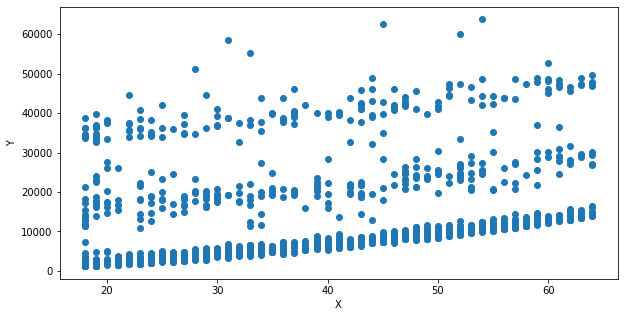

In [4]:
x = data[['age']] # 아래 fit에서 2차원으로 입력해야 할 필요가 있음.
y = data[['charges']]

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- fit() 로 학습
- 단, 2차원 array 여야 함으로 차원을 맞춰 줌

In [5]:
lr = LinearRegression()
lr.fit(x.values,y.values)

LinearRegression()

In [6]:
print('선형회귀 모델 결과')
print(f'절편 : {lr.intercept_}, 계수 : {lr.coef_}, 결정계수 : {lr.score(x,y)}')

선형회귀 모델 결과
절편 : [3165.88500606], 계수 : [[257.72261867]], 결정계수 : 0.08940589967885804


/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- 새로운 데이터로 예측
- 19세는 8062.61476073
- 64세는 19660.13260074 지출 예측

In [7]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


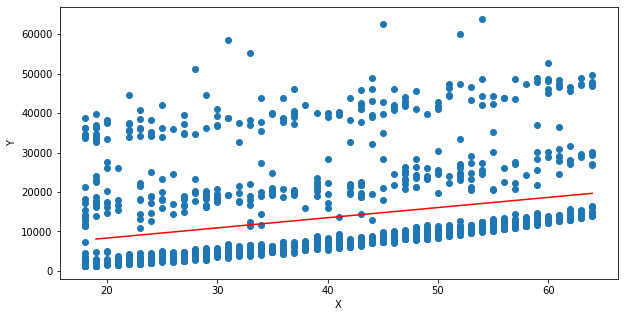

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 경사하강법
### 경사하강법이란
- 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔 가며 최소 함수값을 갖는 독립변수를 찾는 방법
- 이를 위해 파라미터를 반복적으로 저정해 나간다
- 머신러닝에서는, 분석에 사용되는 함수들이 복접해 미분하기 쉽지 않고, 데이터의 양이 많으면 경사하강법이 컴퓨터로 계산하기 쉬워 사용한다.
- 무작위로 초기화 하고 점진적으로 최적화를 진행한다
- 이때 학습 스텝의 크기를 learning rate 라고 한다.
- learning rate가 크면, 함수의 값이 발산할 수 있고, 너무 작으면 학습에 오랜 시간이 걸리는 문제가 있다.

### 경사하강법의 종류
#### 배치 경사하강법
- 반복 시 전체 학습 세트를 사용해 가중치 갱신
- 계산량이 많아 소요 시간 증가
- 학습시 발생하는 노이즈가 적음
#### 확률적 경사하강법
- 한 개의 샘플데이터를 무작위 추출, 경사 계산
- 매 반복마다 가중치가 달라져 비용 함수가 최솟값에 접근할 때 변동이 큼
- 변동성이 커서 최적치가 아닐 수 있지만, 지역 최솟값에 빠지지 않을 가능성도 높다
- 데이터 양이 많아도 계산이 빠르다
#### 미니 배치 경사하강법
- 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 가중치 갱신
- 확률적 경사하강법 보다 지역 최솟값에 빠질 가능성이 크가
- 확률적 경사하강법 보다 낮은 오차율
#### sckit-learn의 SGDRegressor
- SGDRegressor는 확률적 경사하강법 구현
- 손실의 기울기는 각 샘플에서 한 번에 추정되어 모델은 감소하는 강도(learning rate)에 따라 업데이트
- 정규화는 norm L2 또는  norm L1 사용
```python
    class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
    max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1,random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, 
    early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
```

#### 매개 변수

<img src="img/06-04.png" width="800"/>

<img src="img/06-04-02.png" width="800"/>

#### 속성 

<img src="img/06-05.png" width="800"/>

### 메서드
- [] 안의 인자는 생략 가능

<img src="img/06-06.png" width="800"/>

### 코드 구현
- Kaggle의 insurance data (https://www.kaggle.com/datasets/mirichoi0218/insurance) 데이터 사용
- 나이와 의료비용 사이의 선형 모델을 생성

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

data = pd.read_csv("./data/insurance.csv")
x = data[['age']] # 아래 fit에서 2차원으로 입력해야 할 필요가 있음.
y = data[['charges']]

sgd_reg = SGDRegressor(max_iter=2000, random_state=34)
sgd_reg.fit(x, y)

/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=2000, random_state=34)

In [10]:
print('SGD 회귀 모델 결과')
print(f'절편 : {sgd_reg.intercept_}, 계수 : {sgd_reg.coef_}, 결정계수 : {sgd_reg.score(x,y)}')

SGD 회귀 모델 결과
절편 : [6159.33896623], 계수 : [89.07735599], 결정계수 : -0.03823321520978418


- 새로운 데이터로 예측
- 19세는 7851.80873008 
- 64세는 11860.28974972 지출 예측

In [11]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 7851.80873008 11860.28974972]


/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


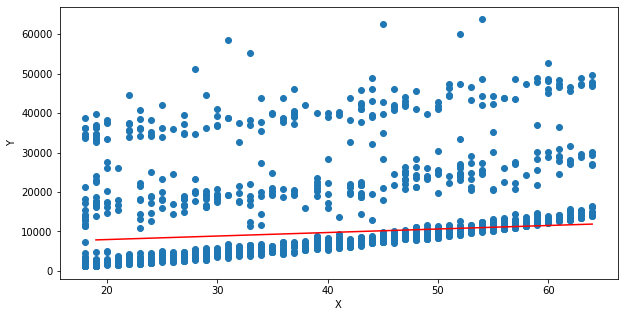

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 다항 회귀(Polynomial Regression)
## 개념
- 데이터가 단순 직선 형태가 아닌 비선형 형태인 경우

### 다항변수 생성
- scikit-learn의 PolynomialFeatures(degree=d) 
- 주어진 차수까지 변수 간의 모든 교차항을 추가
- degree = 3, 변수 $a, b$는 $a^2, a^3, b^2, b^3, ab, a^2b, ab^2$ 를 변수로 추가
- 각 변수의 거듭제곱을 추가해 고차 다항 회귀를 적용하면 훈련데이터에 적합한 모델을 생성할 수 있다.
- 단, 과대적합 가능성

### 선형경합
- PolynomialFeatures로 생성된 변수들을 LinearRegression()에 그대로 대입

## scikit-learn의 PolynomialFeatures
```python
class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
```

### 매개변수
<img src="img/06-07.png" width="800"/>

### 메서드
<img src="img/06-08.png" width="800"/>

### 코드 실습 1
- kaggle의 80가지 시리얼 영양소 평가 데이터
- 소스 : https://www.kaggle.com/datasets/crawford/80-cereals?resource=download

In [13]:
import pandas as pd

df = pd.read_csv('./data/cereal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


- 데이터 전처리, name, mfr, type 변수 제외
- sugars 가 0 이상인 데이터만 추출

In [14]:
df = df.iloc[:, 3:]
df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [15]:
df = df[df.sugars >= 0]
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [16]:
df['sugars'].isna().sum()

0

- 설탕 함유량 (sugars)에 따른 영향등급평가(rating)을 시각화

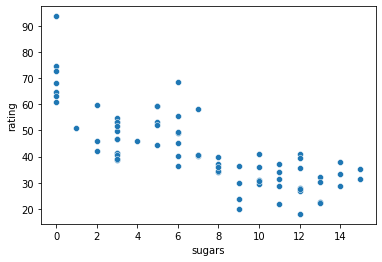

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='sugars', y='rating', data=df)
plt.xlabel('sugars')
plt.ylabel('rating')
plt.show()

- X는 sugras, y는 rating으로 설정
- 7:3 비율로 split

In [18]:
from sklearn.model_selection import train_test_split

X = df['sugars']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53,), (23,), (53,), (23,))

- PolynomialFeatures로 2차 다항식 조건 생성
- fit_transform() 으로 X_poly 생성
- LinearRegression 으로 회구 모델에 적용

In [19]:
type(X_train)

pandas.core.series.Series

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train.values.reshape(-1,1))

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

- 평가를 위해, X_test를 X_test_poly로 변환 후 predict 결과를 구한다.

In [22]:
X_test_poly = poly_reg.transform(X_test.values.reshape(-1, 1))
pred = reg.predict(X_test_poly)

- 다양한 성능 지표로 모델 예측력 평가

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"ACC : {acc*100:.3f}%")

MSE : 99.654
MAE : 7.564
RMSE : 9.983
ACC : 40.139%


- 결과의 시각화

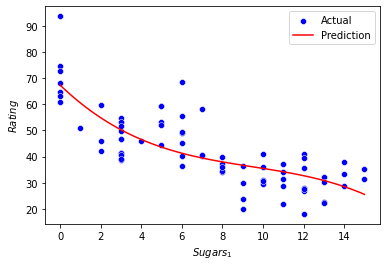

In [24]:
X_new = np.linspace(0, 15, 100)
X_new_poly = poly_reg.transform(X_new.reshape(-1, 1))
y_new = reg.predict(X_new_poly)
sns.scatterplot(x='sugars', y='rating', data=df, label='Actual', color='blue')
sns.lineplot(x=X_new, y=y_new, label='Prediction', color='red')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

### 코드 실습 2
- 동일한 데이터로 고차 다항 회귀 분석
- 설명 변수를 12개 사용

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53, 12), (23, 12), (53,), (23,))

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_scaled_poly = poly_reg.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_reg.fit_transform(X_test_scaled)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled_poly, y_train)
pred = reg.predict(X_test_scaled_poly)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_scaled_poly, y_test)
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"ACC : {acc*100:.3f}%")

MSE : 28.214
MAE : 4.572
RMSE : 5.312
ACC : 83.052%


# 다중 회귀(Multiple Regression)
## 다중 회귀 개념
- 다중의 독립변수가 있는 회귀 분석
- 여러개의 독립변수가 복합적으로 종속 변순에 영향을 미치는 경우
    - $\hat{Y} = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i}$
    - $\hat{Y}$는 예측값
    - n은 독립변수의 수(또는 입력변수의 개수)
    - i번째 특성 변수를 $x_{i}$
    - $\beta_{i}$는 i 번째 모델 파라미터
- 변수가 많으면 과적합 발생 가능성이 있기에 다양한 규제를 적용, 모델의 가중치 제한

### 변수선택법
- 다중 선형 모델의 성능을 높이기 위해, 독립변수의 부분 집합을 선택
- 전진선택법, 후진선택법, 단계적선택법

#### 규제가 있는 다항 회귀 모델
- 성능에 도움이 안되는 회귀 계수의 크기를 0으로 수축
- Ridge, Lasso, Elastic Net

##### 릿지 (Ridge)
- 최소제곱 적합식의 수축 패널티라 불이우는 항에 L2 패널티 추가
    - $RidgedMSE(\beta) = MSE(\beta) + \alpha\frac{1}{2}\sum_{i=1}^n\beta_{i}^2$
- $\alpha\frac{1}{2}\sum_{i=1}^n\beta_{i}^2$ 가 수축 패널티
- 이 항은 0에 가깝지만 0이 되긴 힘들다. 그러나 0에 가까워 지는 것 만으로 규제 효과는 있다.
- 이 규제한은 데이터를 학습하는 동안에만 비용함수에 추가 되어 모델의 학습이 끝나면 수축 패널티의 규제가 없는 성능지표로 모델의 예측성능을 평가
- $\alpha$는 하이퍼 파라미터로, 모델을 얼마나 많이 규제할지 조절 하는 역할
- 릿지 회귀가, 최소제곱법 대비 나은 점은, 편향 - 분산 절출 관점에서 
- $\alpha$가 증가하면 릿지 회귀의 적합의 유연성이 줄어 들어 편향은 증가, 분산은 감소
- 학습 데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복 가능
- $2^p$를 탐색 해야 하는 변수 선택법 대비 빠르다.

*scikit-learn의 Ridge*
```python
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
```

- 매개 변수

<img src="img/06-09-01.png" width="800"/>
<img src="img/06-09-02.png" width="800"/>

- 속성

<img src="img/06-10.png" width="800"/>

- 메서드

<img src="img/06-11.png" width="800"/>

- 코드실습
    - scikit-learn에서 제공하는 당뇨 데이터

In [28]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabets = load_diabetes()
X = pd.DataFrame(diabets.data, columns = diabets.feature_names)
y = diabets.target

In [29]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- $\alpha$ 값에 따른 학습 결과에 따른 릿지 회귀 계수를 데이터 프레임에 저장

In [30]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [31]:
coef = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coef.append(ridge.coef_)
df_ridge = pd.DataFrame(coef, index=alpha, columns=X.columns)
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


- a 값에 따른 릿지 계수의 0으로의 수렴화 정도를 시각화
- a 이 커지면 점점 0에 수렴한다.

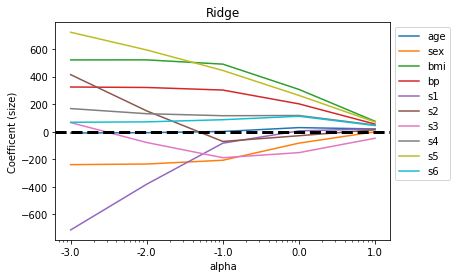

In [32]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels= df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficent (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

- MSE를 사용한 모델과의 비교
- 릿지에서 a=0일때와 같은 효과

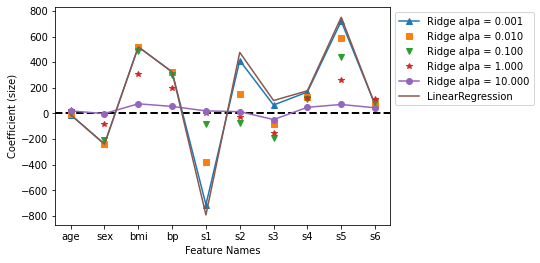

In [33]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#####  라쏘(Lasso)
- RidgeMSE의 수축 패널티항은 모든 계수가 0에 가까워지긴 하지만 0이 되지는 않는다.
- 라쏘 회귀는 최소제곱 적합식의 수축 패널티라 불리는 L1 패널티 추가 한 것
    - $LassoMSE(\beta) = MSE(\beta) + \alpha\sum_{i=1}^n|\beta_{i}|$
- 릿지와 다르게 수축 패널티인 $\sum_{i=1}^n|\beta_{i}|$ 가 0이 될 수 있다.
- scikit-learn의 lasso
```python
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```
- 매개 변수

<img src="img/06-12.png" width="800"/>

- 속성

<img src="img/06-13.png" width="800"/>

- 메서드

<img src="img/06-14.png" width="800"/>

- 코드 실습

In [34]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

coef = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coef.append(lasso.coef_)
df_lasso = pd.DataFrame(coef, index=alpha, columns=X.columns)
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


- a 값이 증가 할 수록 회귀계수의 값이 점점 0이 된다.

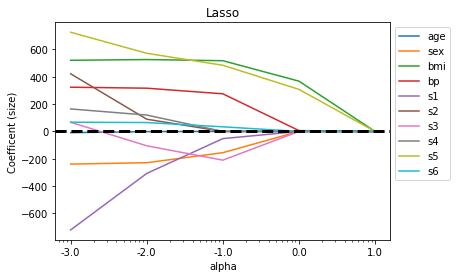

In [35]:
import matplotlib.pyplot as plt

plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels= df_lasso.columns, bbox_to_anchor=(1,1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficent (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

- MSE와의 비교에서, 랏소에서 a가 작을 수록 MSE와 유사한 회귀계수를 가진다.
- 랏소에서 a가 10인 경우는 회귀계수가 0이지만, 릿지는 0에 가까울 뿐 0은 아니였다.

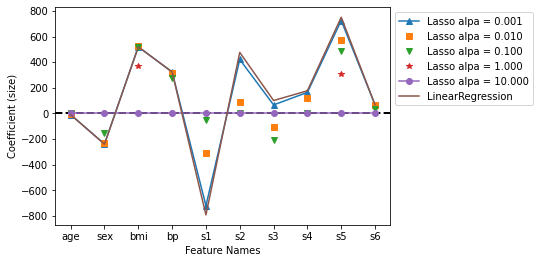

In [36]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^-', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

##### 엘라스틱넷(Elastic Net)
- 릿지 회귀와 라쏘 회귀의 절충 알고리즘
- 수축 패널티는 릿지와 라쏘의 것을 혼합 비율 $r$을 사용하여 혼합한다.
- $r=0$ 이면 릿지 회귀, $r=1$ 라쏘 회귀의 효과를 낸다.
    - $ElasticNetMSE(\beta) = MSE(\beta) + r\alpha\sum_{i=1}^n|\beta_{i}| +  \frac{1-r}{2}\alpha\sum_{i=1}^n\beta_{i}^2$
- sciket-learn의 ElasticNet
```python
class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```
- 매개 변수

<img src="img/06-15.png" width="800"/>

- 속성

<img src="img/06-16.png" width="800"/>

- 메서드

<img src="img/06-17.png" width="800"/>

- 코드 실습

In [37]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

coef = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a)
    ela.fit(X, y)
    coef.append(ela.coef_)
df_ela = pd.DataFrame(coef, index=alpha, columns=X.columns)
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


- a가 증가 할 수록 회귀 계수의 값이 0에 수렴한다.

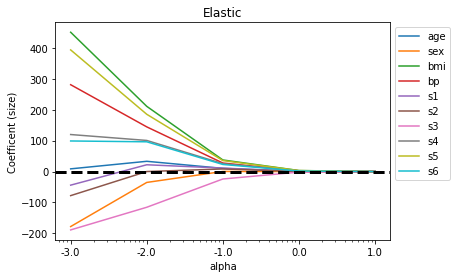

In [38]:
import matplotlib.pyplot as plt

plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels= df_ela.columns, bbox_to_anchor=(1,1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficent (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

- MSE 와의 비교시, a가 작은 엘라스틱 회귀 모델의 회귀 계수와 유사
- a가 커질수록 회귀계수가 0에 가까워진다.

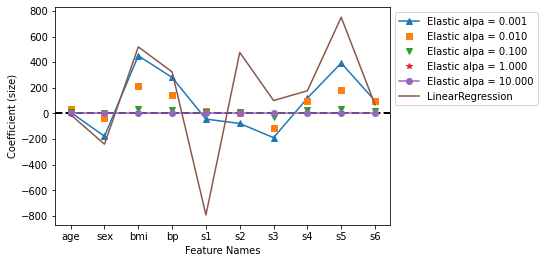

In [39]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# 로지스틱 회귀(Logistic Regression)

## 개념
- 선형 모델을 분류에 사용
- 반응변수가 범주형일 때 사용
- Y가 속할 확률을 구함
- 예) 누군가의 카드 대금으로 연체될 확률 구하기

### $P(x)$와 $X$ 사이의 모델
- 독립변수의 가중치 합으로 $P(x)$와 $X$ 사이의 관계를 나타냄
- 다만 특정 범주에 속하는 확률인 로지스틱 회귀를 선형 회귀 모델처럼 $P(x) = \beta_{0} + \beta_{1}X$ 로 표현하는 것은 맞지 않는다.

<img src="img/06-18.png" width="800"/>

- $P(X) = Pr(Y=1|X)$ 와 $X$ 사이의 관계를 모델링할 때 새로운 접근 필요.
- X가 매우 큰 음수일 땐 0, 매우 큰 양수일땐 1이 되도록 로지스틱(시그모이드) 함수 사용해야
    - $Y = \frac{1}{1+e^{-X}}$

### 승산비(Odds)
- Odds는 '실패에 비해 성공할 확률'
- $Odds = \frac{p}{1-p}$ 로 표현

<img src="img/06-19.png" width="400"/>

- p가 크면 odds는 무한대로 발산 -> 범위의 한계를 극복해야 할 필요 -> log 취함
- $ -\infty < log(Odds)< \infty $
- $ log(Odds) = log(\frac{P(X)}{1+P(X)})=\beta_{0} + \beta_{1}X)$
- $ Odds = \frac{P(X)}{1+P(X)}=e^{\beta_{0} + \beta_{1}X} $
- $ P(X) = \frac{1}{1+e^{\beta_{0} + \beta_{1}X}}$
- 설명변수 X에 대해 선형적인 로짓을 가진다
- X에 속할 수록 Y를 할 확률이 $e^\beta$ 배 증가

### 훈련 및 비용 함수
- 학습데이터에 기초헤 회귀계수 추정 -> MLE( Maximum Likelihood Estimation, 최대 우도 추정법) 
- MLE는 확률 모형의 모수 추정에 일반적으로 사용
- 베이즈 규칙을 활용하여 우도 추정 가능
- 성공과 실패 두가지만 있을 경우, 베르누이 확률 분포를 사용 할 수도
- $l(\beta_{0}, \beta_{1}) = \prod_{i:y_{i}=1}P(x_{i})\prod_{j:y_{j}=0}(1-P(x_{j}))$
- $l(\beta_{0}, \beta_{1})$ (우도함수) 가 최소가 되도록 이를 미분 하여 최소가 되도록 하는 $\beta_{0}, \beta_{1}$ 를 찾는다

### scikit-learn의 LogisticRegression
```python
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
#### 매개변수

<img src="img/06-20.png" width="800"/>

#### 속성

<img src="img/06-21.png" width="800"/>

#### 메서드

<img src="img/06-22.png" width="800"/>

- 대괄호 안의 인자 생략 가능

<img src="img/06-22-02.png" width="800"/>

#### 코드 구현
- kaggle의 Body performance Data
- https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [40]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('./data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


- gender, 남자면 0, 여자면 1, np.where 사용
- class는, A는 1, A가 아닌 경우는 0

In [41]:
body['gender']=np.where(body['gender'] == 'M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [42]:
from sklearn.model_selection import train_test_split

feature_columns = body.columns.difference(['class', 'class_1'])
X=body[feature_columns]
y=body['class_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9375, 11), (4018, 11), (9375,), (4018,))

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

- predict_proba와 decision_function을 구하여 시각화 해 본다.
- predict_proba는 각 레코드의 더이터가 각 클래스에 있을 확률 (위의 경우 A에 속할 확률)
- decision_function은 분리 초평면까지의 거리

In [44]:
proba = pd.DataFrame(log_reg.predict_proba(X_train))
dsf = pd.DataFrame(log_reg.decision_function(X_train))

df = pd.concat([proba, dsf], axis=1)
df.columns=['Not A', 'A', 'decision_function']

df = df.sort_values(['decision_function']).copy()
df = df.reset_index(drop=True)
df.head()

,Not A,A,decision_function
0,1.0,1.407561e-08,-18.078822
1,1.0,5.260648e-08,-16.760427
2,1.0,6.801165e-08,-16.503587
3,1.0,9.097114e-08,-16.212723
4,1.0,1.088397e-07,-16.033390


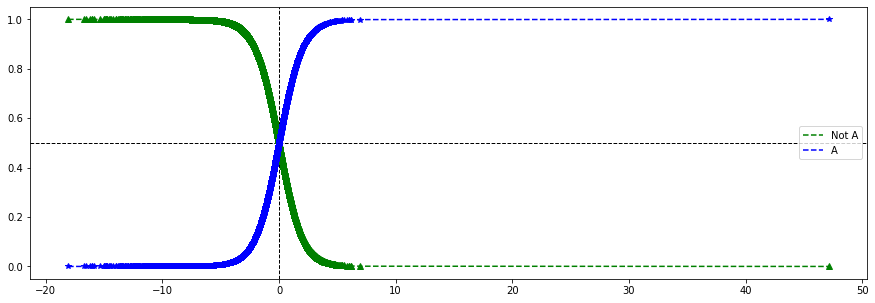

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend()
plt.show()

- 테스트 데이터 세트로 성능평가
- 정확도, 정밀도, 재현율, F1 스코어, AUC

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = log_reg.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_roc = roc_auc_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 : {test_acc:.2f}')
print(f'정밀도 : {test_prc:.2f}')
print(f'지현율 : {test_rcll:.2f}')
print(f'F1 스코어 : {test_f1:.2f}')
print(f'AUC : {test_roc:.2f}')

[[2761  253]
 [ 350  654]]


정확도 : 0.85
정밀도 : 0.72
지현율 : 0.65
F1 스코어 : 0.68
AUC : 0.78


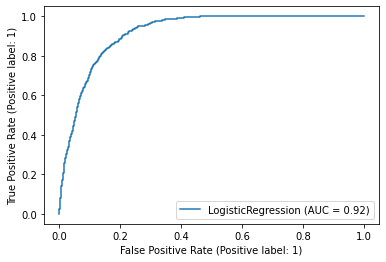

In [47]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg, X_test, y_test)
plt.show()

## 다중 클래스 분류 - 소프트맥스 회귀
### 개념
- 로지스틱 회귀 모델을 2개 이상의 다중 클래스를 지원하도록 일반화 한것
- 다항 로지스틱 회귀(Multinomial Logistic Regression) or 소프트맥스 회귀 (Softmax Regression) 이라고 함
- k차원의 벡터 입력을 받아, 각 클래스에 대한 점수 $S_{k}(X)$를 계산하고 그 점수에 소프트 맥스 함수를 적용해, 각 클래스의 확률 추정
- k차원 벡터에서 i번째 클래스가 정답일 확률을 $\hat{p_{k}}$ 라고 하면, 
    -  $\hat{p_{k}} = \sigma(S(X))_{k} = \frac{exp(S_{k}(X))}{\sum_{j=1}^Kexp(S_{j}(X))}$
- 클래스가 3개인 경우, (k=3) 3차원 벡터를 입력 받으면 소프트맥스 함수는 아래와 같다.

<img src="img/06-23.png" width="600"/>

### scikit-learn의 LogisticRegression의 매개변수를 활용한 소프트맥스
- LogisticRegression의 multi_class 매개 변수를 'multinomial'로 바꾸면 소프트맥스 회귀를 사용 가능하다.


In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('./data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


- gender 변수에서 남자는 0, 여자는 1
- 각 class는 A:0, B:1, C:2, D:3 으로 변환

In [49]:
body['gender']=np.where(body['gender'] == 'M', 0, 1)
body['class_2']=body['class'].map({'A':0,'B':1,'C':2, 'D':3})
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1


In [50]:
from sklearn.model_selection import train_test_split

feature_columns = body.columns.difference(['class', 'class_2'])
X=body[feature_columns]
y=body['class_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9375, 11), (4018, 11), (9375,), (4018,))

In [51]:
from sklearn.linear_model import LogisticRegression
softm = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 : {test_acc*100:.2f}')

[[707 261  36   0]
 [269 403 299  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]


정확도 : 59.91


- test셋의 첫번째 데이터를 입력
- 62%로 A 예측

In [53]:
softm.predict(X_test.iloc[-1:,:])

array([0])

In [54]:
softm.predict_proba(X_test.iloc[-1:,:])

array([[0.62640047, 0.31189883, 0.06015624, 0.00154446]])

# 서포트 벡터 머신(Support Vector Machine)

## 개념
- 서포트 벡터 머신(Support Vector Machine)은 새로운 데이터가 입력 되었을 때, 기존 데이터를 활용해 분류 하는 방법
- 최대마진 분류기를 일반화 한것

### 최대 마진 분류기
- 초평면에 대한 이해 필요
- 초평면은 p차원 공간에서 차원이 (p-1) 인 평평한 아핀(affine)부분 공간이다.
    - $\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} = 0$
- p차원 공간의 점 $X=(X_{1}, X_{2}, ... , X_{p})^T$ 가 위의 식을 만족하면, 점 X는 초평면상에 있다.
- 관측값은 초평면의 위나 아래에 존재
    - $\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} > 0$
    - $\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} < 0$
- 단 이와 같은 초평면은 무한개 존재
- 마진의 개념을 사용하여 초평면 결정
- 즉, 관측치들에서 초평면까지의 가장 짧은 거리인 마진이 가장 큰 분리 초평면을 찾는다.
- 양의 초평면과 음의 초평면에 접한 관측값들을 서포트 벡터 라고 정의
- 서포트 벡터는 초평면에 가장 까까이 붙어 있는 최전방 데이터

<img src="img/06-24.png" width="600"/>

### 서포트 벡터 분류기
- 모든 데이터를 초평면에 의해 두 영역으로 분류 할 수 있지 않다.
- 최대 마진 분류기는 모든 데이터에 적용이 어렵다 (과적합)
- 서포트 벡터 분류기는 최대마진 분류기를 가지면서도 일부 관측치들이 마진이나 초평면의 반대쪽에 있는 것을 허용

<img src="img/06-25.png" width="600"/>

- 조건 3의 C는 오차를 튜닝하는 하이퍼파라미터
- C의 크기에 따라 오차 허용도가 달라진다. (클수록 허용도 커짐)

### 서포트 벡터 머신
- SVC는 선형인 경우 사용
- 비선형인 경우 SVC를 커널(Kernel) 을 활용하여 확장, 서포트 벡터 머신(SVM : Support Vector Machine) 사용
- 커널은 두 관측치들의 유사성을 수량화 하는 함수

<img src="img/06-26.png" width="600"/>

### 서포트 벡터 회귀
- SVM을 회귀에 적용
- SVR(Support vector regression)은 SVM의 개념을 회귀에 활용한 것
- 제한된 마진 오류 안에서 가능한 많은 데이터 샘플이 들어가도록 학습

<img src="img/06-27.png" width="600"/>


- 손실함수로 epsilon-insensitivie 함수 사용

<img src="img/06-28.png" width="600"/>

- 수식에 사용된 하이퍼파라미터 중 C(Cost) 는 비용을 의미하여 패널티항을 통해 규제 정도 결정
- C가 작을 수록 예측한 값에 대한 패널티를 많이 부과 -> 회귀식이 평평해짐
- $\epsilon$ 은 회귀식 아래쪽으로 혀용되는 노이즈 정도, $\epsilon$ 클수록 허용 노이즈가 많아진다.
- $\zeta$는 회귀식 위쪽에서 도로의 폭에서 벗어난 거리이며, $\zeta^*$는 회귀식 아래쪽에서 도로의 폭에서 벗어난 거리

<img src="img/06-29.png" width="600"/>

## scikit-learn의 LinearSVC
```python
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
```

### 매개변수

<img src="img/06-30-01.png" width="600"/>
<br>
<img src="img/06-30-02.png" width="600"/>

### 속성

<img src="img/06-31.png" width="600"/>

### 메서드

<img src="img/06-32.png" width="600"/>


### 코드 실습

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/classification.csv')
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


- 데이터 class의 분포를 산포도로 확인

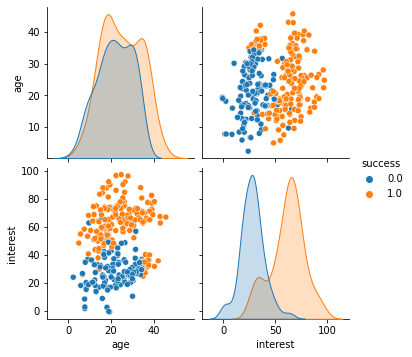

In [56]:
sns.pairplot(data=df, hue='success');

- 설명변수와 타겟 변수를 설정 후, 7:3 비율로 분할

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop('success', axis=1)
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((207, 2), (90, 2), (207,), (90,))

- SVM은 스케일에 민감
- StandardScaler를 사용하면 예측력 향상 가능

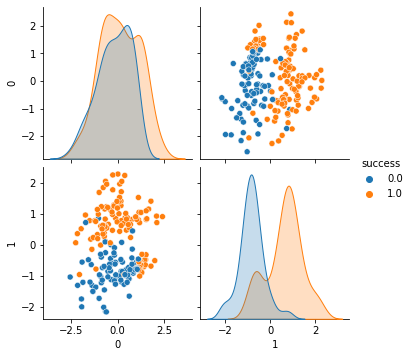

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
sns.pairplot(data=pd.concat([pd.DataFrame(X_train_scaled), y_train.reset_index(drop=True)], axis=1), hue='success');

- SVC 모델을 만들고 데이터를 학습 시킨다

In [73]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

- 모델 평가

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_test_scaled = scaler.transform(X_test)
pred = svc.predict(X_test_scaled)

In [75]:
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 : {test_acc}')
print(f'정밀도 : {test_prc}')
print(f'재현율 : {test_rcll}')
print(f'F1 : {test_f1}')


[[38  1]
 [ 2 49]]


정확도 : 0.9666666666666667
정밀도 : 0.98
재현율 : 0.9607843137254902
F1 : 0.9702970297029702


- C에 따른 마진의 변화의 시각화
- C의 값이 커지면, 마진과 옳지 않은 데이터의 허용치가 증가

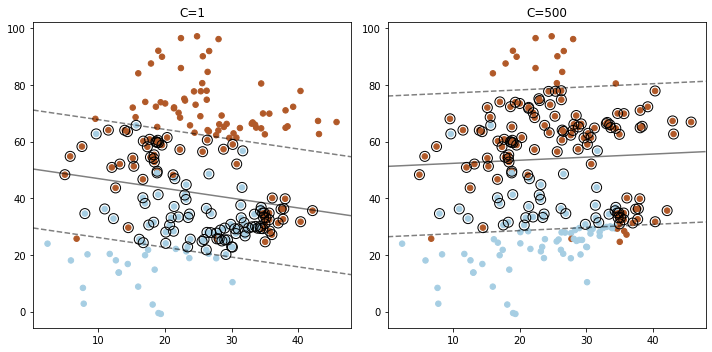

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
# X_train = X_train.values.reshape(-1, 1)
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(X_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train.iloc[support_vector_indices,:]

    plt.subplot(1, 2, i +1)
    # print(X_train.iloc[:,0])
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c =y_train, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors.iloc[:, 0],
        support_vectors.iloc[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

## scikit-learn SVR
- 서포트 벡터 방식으로 회구분석을 구현하는 LinearSVR 함수

```python
class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

### 매게변수

<img src="img/06-33-01.png" width="600"/>
<br>
<img src="img/06-33-02.png" width="600"/>

### 속성

<img src="img/06-34.png" width="600"/>

### 메서드 

<img src="img/06-35.png" width="600"/>

### 코드 실습

In [2]:
import numpy as np

# 샘플 데이터 생성
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

X[:6], y[:6]

(array([[0.09631087],
        [0.21522349],
        [0.24458786],
        [0.32595777],
        [0.39045443],
        [0.50544989]]),
 array([0.09616204, 0.21356576, 0.24215647, 0.32021627, 0.38060868,
        0.48420112]))

In [3]:
# 타겟 데이터에 노이즈 추가
y[::5] +=3 *(0.5 - np.random.rand(8))
y[:10]

array([0.78018381, 0.21356576, 0.24215647, 0.32021627, 0.38060868,
       1.62458668, 0.50713007, 0.53616516, 0.73589208, 0.85927306])

- 다음 각각의 커널 함수를 사용하여 SVR 모델 구축
- 랜덤포레스트(rbf), 선형 회귀(linear), 다항회귀(poly)

In [6]:
from sklearn.svm import SVR

# 회귀 모델 적합 시키기

svr_rbf = SVR(kernel='rbf', C=100, gamma=.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

- 각각의 예측 모델의 성능 평가

In [7]:
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index =kernel,columns =evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.1,0.31,0.17
Linear,0.29,0.54,0.4
Polynomial,0.12,0.34,0.17


- 결과의 시각화

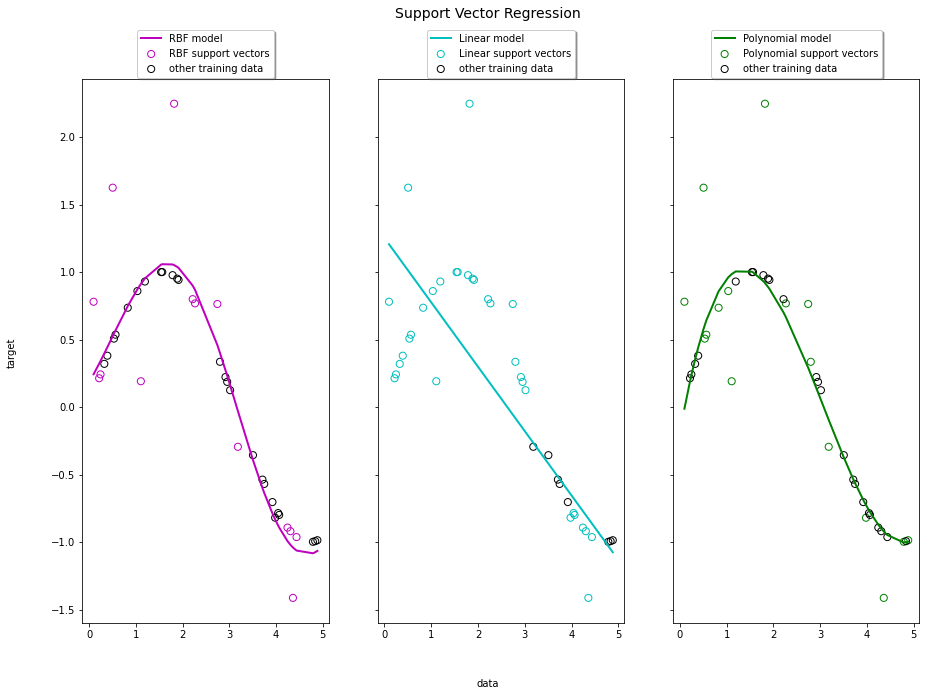

In [8]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# K-최근접 이웃(KNN)

## 개념
- 유사한 특성을 가진 데이터는 유사한 범주에 있다는 가정
- 학습데이터 저장 -> 새로운 데이터 획득 -> 기존 데이터에서 가장 가까운 k개 포인트로 범주 라벨링

### KNN분류
- 가장 가까운 학습 데이터 포인트 하나를 최근접 이웃으로 선택해 예측에 사용
- 아래 그림에서 빨간 데이터의 범주는 가장 가까운 데이터로 결정

<img src="img/06-36.png" width="600"/>

- 거리 계산에는 유클리디안을 많이 사용

<img src="img/06-37.png" width="600"/>

- 경계를 명확히 알수 없는 상황에서는 k의 수 조절
- k=1 인 경우 노이즈에 민감함
- k의 수에 따라 빨간 점의 범주가 달라진다.

<img src="img/06-38.png" width="600"/>

### KNN회귀
- 가까운 데이터를 이용해 개별 값을 예측
- k개의 이웃 데이터를 사용해 회귀선을 도출
- 주어진 입력값으로 가장 잘 예측된 평균값들의 집합을 구한다.
- 예를들어 아래는 k=3인 경우 빨간 선의 값을, 빨간 선과 가장 가까운 3개의 값의 평균으로 예측한다.

<img src="img/06-39.png" width="600"/>

- 만약 x축이 '시점'이라면, KNN회귀 모델은 모든 시점의 평균 데이터를 예측한다.

<img src="img/06-40.png" width="600"/>

## scikit-learn의 KNeighborsClassifier
```python
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
```

### 매개변수
<img src="img/06-41.png" width="600"/>


### 메서드
<img src="img/06-42.png" width="600"/>


### 코드 실습
- 인도의 갈질환자에 대한 데이터
- 간질환자는 두 집단으로 분류 되어 있음
- 이 분류를 타겟으로 하여 KNN분류를 시행해 보자
- URL : https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [3]:
import pandas as pd

liver = pd.read_csv('./data/indian_liver_patient.csv')
print(liver.Dataset.value_counts())
liver.head()

1    416
2    167
Name: Dataset, dtype: int64


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


- Gender 변수 one-hot-encoding

In [4]:
import numpy as np

liver.Gender = np.where(liver.Gender=='Female', 0, 1)
liver.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [5]:
# 결측치 확인
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# 결측치 제거
liver = liver.dropna(axis=0)
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [7]:
# 학습용 데이터 분리

from sklearn.model_selection import train_test_split

X = liver.drop(columns='Dataset')
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 10), (174, 10), (405,), (174,))

In [8]:
# KNN 분류기 생성 및 학습

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [12]:
# 예측 성능

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = knn_clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 {test_acc:.2f}')
print(f'정밀도 {test_prc:.2f}')
print(f'재현율 {test_rcll:.2f}')
print(f'F1 {test_f1:.2f}')

[[106  18]
 [ 39  11]]


정확도 0.67
정밀도 0.73
재현율 0.85
F1 0.79


## scikit-learn의 KNeighborsRegressor
```python
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
```

### 매개변수

<img src="img/06-43-01.png" width="600"/>
<br>
<img src="img/06-43-02.png" width="600"/>


### 메서드
<img src="img/06-44.png" width="600"/>

### 코드 실습

In [1]:
import numpy as np

np.random.seed(0)

X = np.sort(5*np.random.rand(400,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

In [2]:
# 타겟 데이터에 노이즈 추가
y += 1*(0.5-np.random.rand(400))

In [3]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 1), (120, 1), (280,), (120,))

In [4]:
# KNeighborRegressor 를 이용하여, wegihts를 다르게 설정한 KNN 모델 학습

from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(X_train, y_train)
knn_dis.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [5]:
# 예측

uni_pred = knn_uni.predict(X_test)
dis_pred = knn_dis.predict(X_test)

In [6]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from sqlalchemy import column

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index = weights, columns=evls)

for pred, weight in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)

    results.loc[weight]['mse'] = round(mse, 2)
    results.loc[weight]['rmse'] = round(rmse, 2)
    results.loc[weight]['mae'] = round(mae, 2)

results    

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


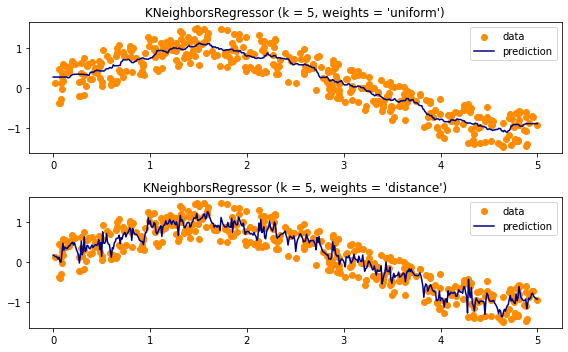

In [8]:
# 결과의 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(["uniform", "distance"]):
    knn=KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i +1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (5, weights))

plt.tight_layout()
plt.show()

# 의사결정나무(Decision Tree)
## 개념
- 데이터를 분류하고 예측하는 결정에 이르기 위해 특정 기준에 따른 '예/아니오'를 답할 수 있는 질문을 이어 나간다.
- 결과는 이런 질문들의 기준에 따라 분류 규칙을 명확하게 해석 할 수 잇다.
- 입력변수와 목표변수에 범주형과 연속형 데이터를 모두 사용 가능하다.
- 선형성과 정규성등의 가정이 필요하지 않아 전처리가 성능에 영향을 크게 미치지 않는다.

### 결정트리 생성하기
- 결정트리 = '정답에 가장 빨리 도달하는 질문목록'
- 최적의 분리규칙을 찾는것
- 하지만 과도한 트리는 과적합 발생 -> 정지규칙에 따라 트리 생성 중단 필요.

#### 이산형 목표 변수
- 지도학습, 분류
- 기준값에 따른 분리기준
    - 카이제곱 통계량 p값, 지니지수, 엔트로피지수

#### 연속형 목표 변수
- 지도학습, 회귀
- 기준값에 따른 분리기준
    - 분산분석에서 F통계량, 분산의 감소량

### 결정트리 복잡도 제어하기
- 트리의 크기 = 의사결정나무 모델의 복잡도
- 트리의 크기가 너무 크면 과적합 발생
- 가지치기를 이용 트리 성장 제한
- 사이킷런에선, 사전가지치기 지원
- 사전가지치기란, 트리의 최대 깊이나 리프의 최대 개수 등을 하이퍼파라미터로 제한 하는 것

### 트리의 특성 중요도
- 변수 중요도(특성 중요도, feature importance)는 트리를 만드는 과정에서 결정에 변수가 얼마나 기여 했는가를 수치화 한것.
- 0~1 사이 값으로, 변수 중요도의 총 합은 1

### 의사결정나무의 장단점

<img src="img/06-45.png" width="600"/>

## scikit-learn의 tree.DecisionTreeClassifier
```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```

### 매개변수
<img src="img/06-46.png" width="600"/>

### 속성
<img src="img/06-47.png" width="600"/>

### 메서드
<img src="img/06-48.png" width="600"/>


### 코드 실습
- UCI Machine Learning 저장소의 독일 신용데이터
- 소스 : https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
import pandas as pd

df = pd.read_csv('./data/credit_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
# 종속변수, 독립변수 선택

X = df.drop(columns='credit.rating', axis=1)
y = df['credit.rating']

# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

In [5]:
# DecisionTreeClassifier 로 모델 학습
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
# 예측 성능 평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 {test_acc:.2f}')
print(f'정밀도 {test_prc:.2f}')
print(f'재현율 {test_rcll:.2f}')
print(f'F1 {test_f1:.2f}')

[[ 28  62]
 [ 25 185]]


정확도 0.71
정밀도 0.75
재현율 0.88
F1 0.81


In [7]:
# classification_report로 분석 결과 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


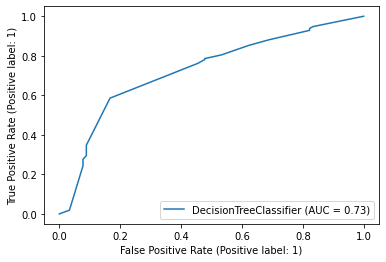

ROC AUC score : 0.7264285714285714


In [8]:
# ROC 곡선으로 시각화 및 AUROC 계산
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, X_test, y_test)
plt.show()

score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f'ROC AUC score : {score}')

In [23]:
# 변수 중요도 확인
from sqlalchemy import asc


importance = clf.feature_importances_
df_imp = pd.DataFrame(importance, index = X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
df_imp

,Importance
account.balance,0.263282
credit.duration.months,0.187908
previous.credit.payment.status,0.123825
age,0.099625
credit.amount,0.098532
credit.purpose,0.059083
savings,0.053080
apartment.type,0.036866
other.credits,0.034003
residence.duration,0.020960


In [34]:
# 결정트리와 분류 의사결정을 시각화, Graphviz 사용

import numpy as np

feature_names = X.columns
target_names = np.array(['0', '1'])



In [31]:
# !pip install pydot
# !pip install pydotplus

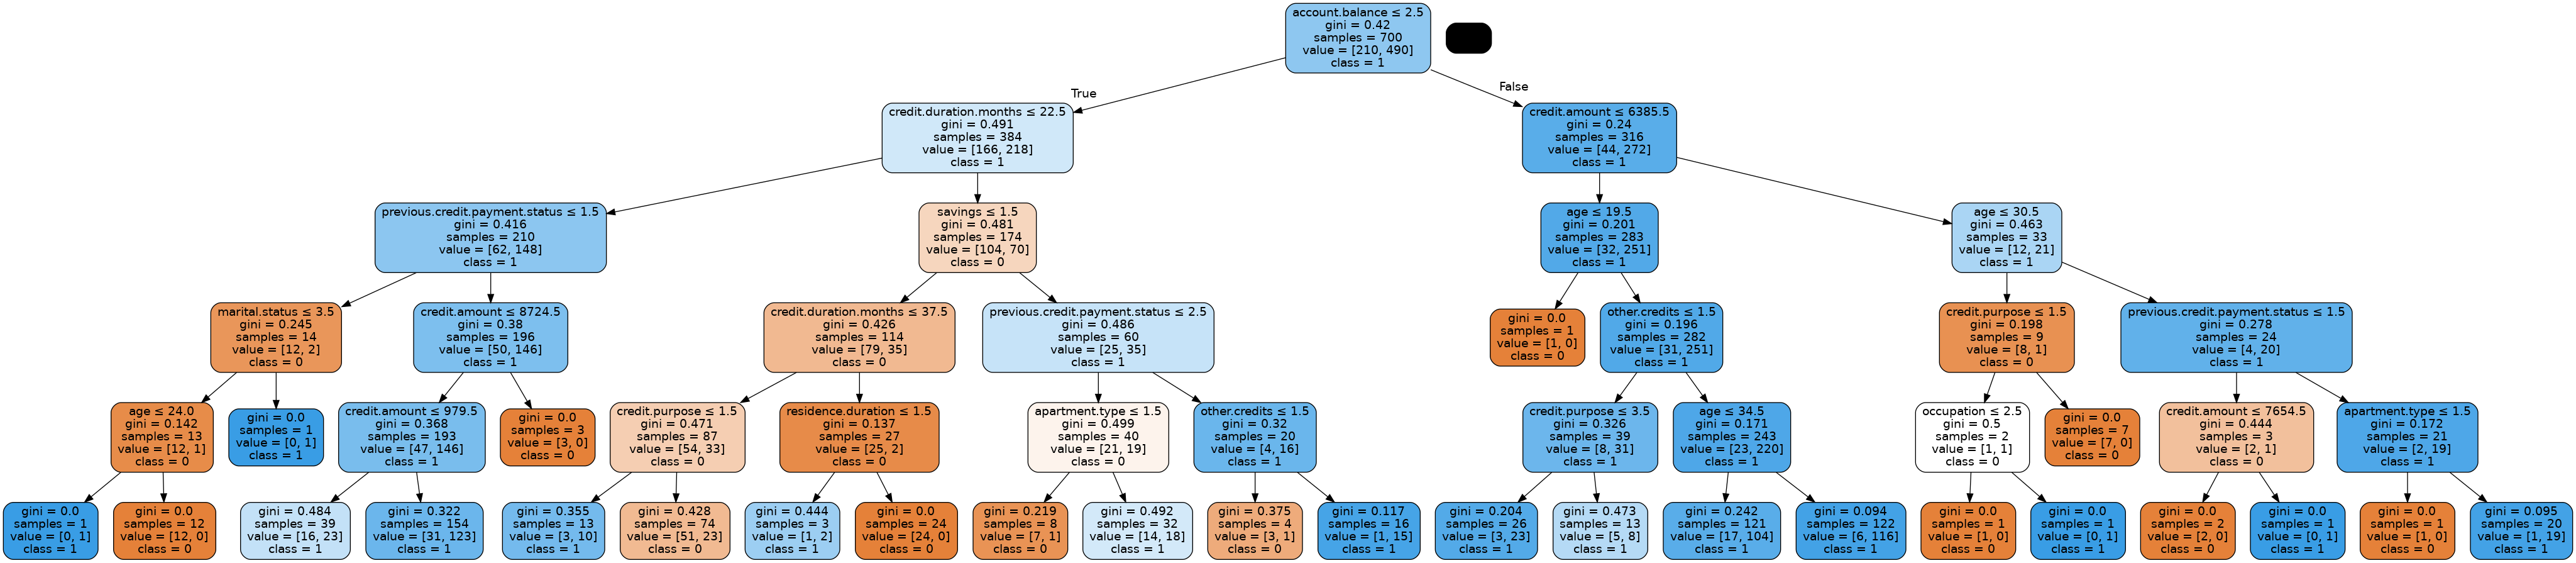

In [35]:
import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

## scikit-learn 의 tree.DecisionTreeRegressor
```python
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
```

### 매개변수
<img src="img/06-49.png" width="600"/>
<br>
<img src="img/06-49-2.png" width="600"/>

### 속성
<img src="img/06-50.png" width="600"/>


### 메서드
<img src="img/06-51.png" width="600"/>


### 코드실습
- Numpy로 임의로 데이터 생성

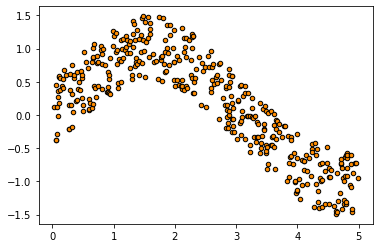

In [36]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = np.sort(5*np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 노이즈 추가
y += 1*(0.5 - np.random.rand(400))
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange',label='data');

In [37]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 1), (120, 1), (280,), (120,))

In [38]:
# max_depth에 따른 결정트리 생성
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=5)

In [39]:
# 각 모델의 예측의 성능 평가

from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_1 = reg_1.fit(X_train, y_train).predict(X_test)
pred_2 = reg_2.fit(X_train, y_train).predict(X_test)
preds = [pred_1, pred_2]
weights = ['max depth=2', 'max depth=5']
evls = ['mse', 'rmse', 'mae']
results = pd.DataFrame(index=weights, columns=evls)
for pred, weight in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)

    results.loc[weight, 'mse'] = round(mse, 2)
    results.loc[weight, 'rmse'] = round(rmse, 2)
    results.loc[weight, 'mae'] = round(mae, 2)

results    

,mse,rmse,mae
max depth=2,0.12,0.35,0.29
max depth=5,0.12,0.35,0.3


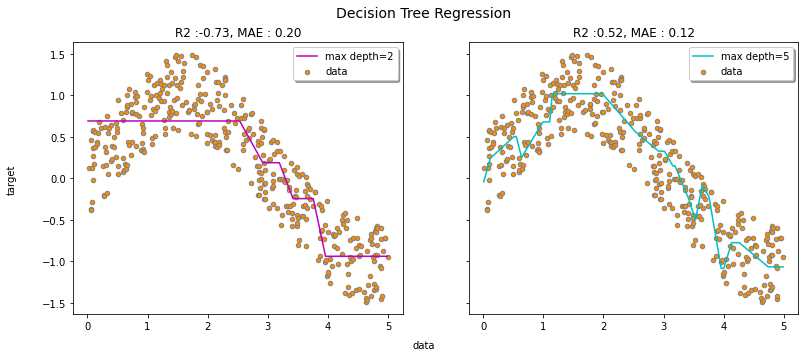

In [46]:
# X_test2 를 생성하여 예측하고 이를 시각화

X_test2 = np.sort(5*np.random.rand(40, 1), axis=0)
y_test2 = np.sin(X_test2).reshape(-1, 1) # y 생성
# y_test2 += 1*(0.5 - np.random.rand(40)) # 노이즈 추가

regs = [reg_1, reg_2]
depths = ['max depth=2', 'max depth=5']
model_color=['m', 'c']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 5))
for ix, reg in enumerate(regs):
    pred = reg.predict(X_test2)
    r2 = reg.score(y_test2, pred)
    mae = mean_absolute_error(y_test2, pred)

    axes[ix].plot(X_test2, pred, color=model_color[ix], label=f'{depths[ix]}')
    axes[ix].scatter(X, y, s=20, edgecolor='gray', c='darkorange', label='data')
    axes[ix].legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
    axes[ix].set_title(f'R2 :{r2:.2f}, MAE : {mae:.2f}')

fig.text(0.5, 0.04, 'data', ha='center', va='center')   
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Decision Tree Regression', fontsize=14)
plt.show()


# 앙상블(Ensemble)

## 개념
- 단일 결정트리의 단점 극복을 위해, 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 방법
- 편향, 잡음 및 분산으로 인한 오류를 억제하고 과적합을 방지한다.
- 배깅(Bagging), 부스팅(Boosting), 랜덤포레스트(Random Forest) 등이 있다.

## 붓스트랩(Bootstrap)
- 랜덤 샘플링의 일종으로, 단순임의복원추출(중복허용)을 적용하여 여러개의 동일한 크기의 표본 자료를 획득하는 방법
- 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로 부터 중복을 허용하여 무작위 재추출 하여
- 복수의 자료를 획득하고, 각각에서 통계량 계산

<img src="img/06-52.png" width="600"/>

## 배깅(Bagging : Boostrap Aggregating)
### 개념
- 주어진 데이터로 붓스트랩하여 예측 모델을 생성
- 각 예측 모형을 결합하여 최종 예측 모형 만든다.
- 분산을 줄이고 모델의 안정성을 크게 향상, 과적합 억제
- 과정은 : 붓스트랩 - 모델링 - 보팅 

<img src="img/06-53.png" width="600"/>

### 보팅(Voting)
- 여러개의 모형으로 부터 산출된 결과를 다수결로 결정
- 의사결정나무의 가지치기는 진행하지 않고, 약한 학습기인 트리를 최대한 학습 시켜 보팅 진행

### 부스팅과의 차이점
- 주어진 자료보다 분산이 적은 앙상블 모델을 얻는데 중점
- 각 붓스트렙에 대해 병렬로 붓스트렙 및 모델링 진행

### Out of Bag
- 붓스트랩을 하면 훈련 데이터의 63%만 샘플링 된다.
- 선택되지 않은 37%의 데이터를 out of bag 샘플이라고 한다.
#### oob_score
- 선택되지 않은 37%의 데이터로 모델을 성능 평가한 결과
- 따라서 별도의 교차검증이 필요 없다.

### Scikit-learn의 ensemble.BaggingClassifier
```python
class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
```

#### 매개변수
<img src="img/06-54.png" width="600"/>

#### 속성
<img src="img/06-55.png" width="600"/>

#### 메서드
<img src="img/06-56-01.png" width="600"/>
<br>
<img src="img/06-56-02.png" width="600"/>

#### 코드 실습
- 위스콘신 유방암 진단 데이터 세트
- 소스 :https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

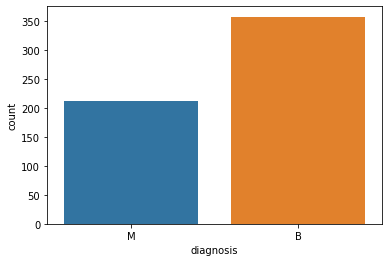

In [22]:
# diagnosis 변수가 타겟 변수
# M은 악성, B는 양성

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data=df)

<AxesSubplot:xlabel='area_mean', ylabel='texture_mean'>

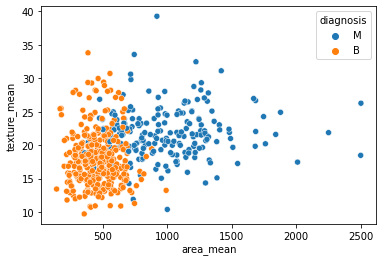

In [23]:
# 설명변수 중 area_mean과 texture_mean을 사용하여 시각화

sns.scatterplot(x='area_mean', y='texture_mean', hue='diagnosis', data=df)

In [24]:
# 범주형인 종속 변수를 M이면 1, M이 아니면 0으로 변경
# 7:3으로 데이터 분할

import numpy as np
from sklearn.model_selection import train_test_split
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)
features = ['area_mean','texture_mean']
X = df[features]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 2), (171, 2), (398,), (171,))

In [25]:
# BaggingClassifier로 분류기 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf_bag.fit(X_train, y_train).predict(X_test)
print(f'Accuracy Score : {clf_bag.score(X_test, pred)}') # 결과가 이상함
print(f'Accuracy Score2 : {accuracy_score(y_test, pred)}') # 이쪽이 맞아 보임

Accuracy Score : 1.0
Accuracy Score2 : 0.8830409356725146


In [26]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pred), index = ['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]'])

,Pred[0],Pred[1]
True[0],105,2
True[1],18,46


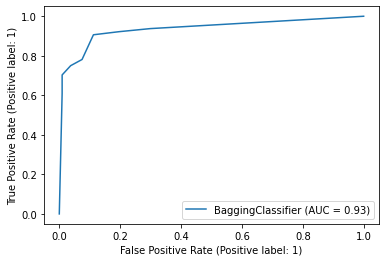

In [27]:
# ROC, AUC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf_bag, X_test, y_test)
plt.show()

In [28]:
# oob_score를 이용한 평가
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
oob_score = clf_oob.fit(X,y).oob_score_
print(f'oob_score : {oob_score}')

oob_score : 0.8611599297012302


### Scikit-learn의 ensemble.BaggingRegressor
```python
class sklearn.ensemble.BaggingRegressor(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
```

#### 매게변수
<img src="img/06-57-01.png" width="600"/>
<br>
<img src="img/06-57-02.png" width="600"/>

#### 속성
<img src="img/06-58.png" width="600"/>

#### 메서드
<img src="img/06-59.png" width="600"/>

#### 코드 실습
- kaggle의 자동차 데이터 셋
- 소스 : https://www.kaggle.com/datasets/goyalshalini93/car-data


In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
# 연속형 범주만 사용
# 타겟은 price
df_num = df.select_dtypes(['number'])
features = list(df_num.columns.difference(['car_ID', 'symboling', 'price']))
X = df[features]
y = df['price']
X.shape, y.shape

((205, 13), (205,))

In [33]:
# 배깅으로 휘귀 분석
# oob_score 로 평가
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
reg.fit(X, y).oob_score_

0.8919891001148893

## 부스팅(Boosting)
### 개념
- 예측력이 약한 모형들을 결합해 강한 예측 모형을 만드는 앙상블의 하나
- 배깅이 붓스트랩을 병렬 수행으로 각 모델을 독립적으로 구축하는 것과 달리
- 부스팅은 순차방식으로 학습해 나간다.

<img src="img/06-60.png" width="600"/>

- 훈련 단계에서 각 모델의 가중치를 분류결과가 좋지 않은 데이터에 높게 할당 한다.
- 다음 학습에서 추출될 확률을 높여, 학습데이터에 대한 성능을 올린다 -> 과적합 우려 있음

### scikit-lean의 ensemble.AdaBoostClassifier
```python
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```

#### 매개변수
<img src="img/06-61.png" width="600"/>

#### 속성
<img src="img/06-62.png" width="600"/>

#### 메서드
<img src="img/06-63.png" width="600"/>

#### 코드 실습
- 위스콘신 유방암 데이터
- 앞서한 것과 같으 전처리 진행

In [34]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/breast-cancer.csv')
import numpy as np
from sklearn.model_selection import train_test_split
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)
features = ['area_mean','texture_mean']
X = df[features]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 2), (171, 2), (398,), (171,))

In [35]:
# AdaBoostClassifier로 학습 및 예측
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
clf_ada = AdaBoostClassifier(base_estimator=None)
pred = clf_ada.fit(X_train, y_train).predict(X_test)
print(f'정확도 : {clf_ada.score(X_test, y_test)}')
print(f'정확도2 : {accuracy_score(y_test, pred)}')

정확도 : 0.9122807017543859
정확도2 : 0.9122807017543859


In [36]:
# 다양한 성능지표로 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_roc = roc_auc_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 : {test_acc:.2f}')
print(f'정밀도 : {test_prc:.2f}')
print(f'지현율 : {test_rcll:.2f}')
print(f'F1 스코어 : {test_f1:.2f}')
print(f'AUC : {test_roc:.2f}')

[[102   5]
 [ 10  54]]


정확도 : 0.91
정밀도 : 0.92
지현율 : 0.84
F1 스코어 : 0.88
AUC : 0.90


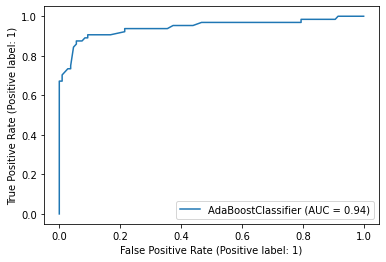

In [37]:
# ROC 커브
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_ada, X_test, y_test)
plt.show()

<AxesSubplot:>

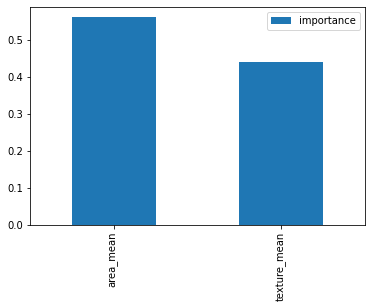

In [42]:
# 중요도 시각화
importance = clf_ada.feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index=['area_mean', 'texture_mean'])
df_importance.plot(kind='bar')

### scikit-learn의 ensemble.AdaBoostRegressor
```python
class sklearn.ensemble.AdaBoostRegressor(base_estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
```

#### 매개변수
<img src="img/06-64.png" width="600"/>

#### 속성
<img src="img/06-65.png" width="600"/>

#### 메서드
<img src="img/06-66.png" width="600"/>

#### 코드 실습
- 앞서 사용한 car 데이터셋 사용


In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/CarPrice_Assignment.csv')
df_num = df.select_dtypes(['number'])
features = list(df_num.columns.difference(['car_ID', 'symboling', 'price']))
X = df[features]
y = df['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143, 13), (62, 13), (143,), (62,))

In [45]:
from sklearn.ensemble import AdaBoostRegressor
reg_ada = AdaBoostRegressor()
pred = reg_ada.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test, y_test)
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"ACC : {acc*100:.3f}%")

MSE : 5197434.511
MAE : 1728.284
RMSE : 2279.788
ACC : 98.511%


<AxesSubplot:>

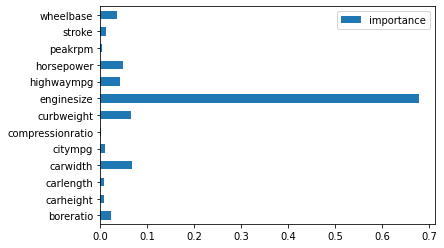

In [48]:
# 변수 중요도
importance = reg_ada.feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index=features)
df_importance.plot(kind='barh')

## 랜덤 포레스트 (Random Forest)

### 개념
- 배깅과 부스팅 보다 더 많은 무작위성을 주어 약한 학습기들을 생성 후 이를 선형 결합 하여 최종 학습기 생성
- 이론적인 설명이나 해석이 어렵지만, 예측력이 매우 높다.

### scikit-learn의 RandomForestClassifier
```python
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```

#### 매개변수
<img src="img/06-67-01.png" width="600"/>
<br>
<img src="img/06-67-02.png" width="600"/>

#### 속성
<img src="img/06-68.png" width="600"/>

#### 메서드
<img src="img/06-69.png" width="600"/>

#### 코드 실습
- 배깅에서 사용한 유방암 데이터


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/breast-cancer.csv')
import numpy as np
from sklearn.model_selection import train_test_split
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)
features = ['area_mean','texture_mean']
X = df[features]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 2), (171, 2), (398,), (171,))

In [8]:
# RandomForestClassifier 모델 생성 후 학습
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = rf_clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_roc = roc_auc_score(y_test, pred)

print(test_cm)
print('\n')
print(f'정확도 : {test_acc:.2f}')
print(f'정밀도 : {test_prc:.2f}')
print(f'지현율 : {test_rcll:.2f}')
print(f'F1 스코어 : {test_f1:.2f}')
print(f'AUC : {test_roc:.2f}')

[[101   6]
 [ 13  51]]


정확도 : 0.89
정밀도 : 0.89
지현율 : 0.80
F1 스코어 : 0.84
AUC : 0.87


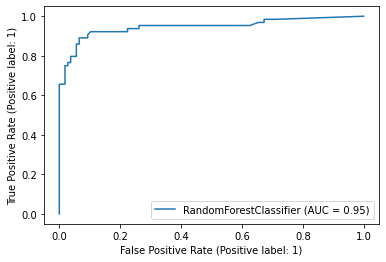

In [10]:
# ROC 커브
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf, X_test, y_test)
plt.show()

<AxesSubplot:>

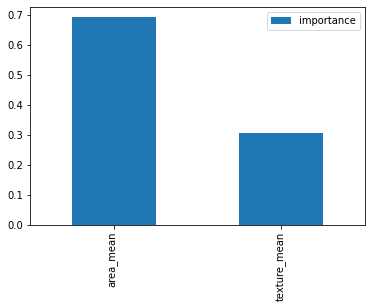

In [11]:
# 중요도 시각화
importance = rf_clf.feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index=['area_mean', 'texture_mean'])
df_importance.plot(kind='bar')

### scikit-learn의 RandomForestRegressor
```python
class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
```

#### 매개변수
<img src="img/06-70.png" width="600"/>

#### 속성
<img src="img/06-71.png" width="600"/>

#### 메서드
<img src="img/06-72.png" width="600"/>

#### 코드실습
- 배깅에서 사용한 자동차 가격 데이터 사용

In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('./data/CarPrice_Assignment.csv')
df_num = df.select_dtypes(['number'])
features = list(df_num.columns.difference(['car_ID', 'symboling', 'price']))
X = df[features]
y = df['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143, 13), (62, 13), (143,), (62,))

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
pred = rf_reg.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = rf_reg.score(X_test, y_test)
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"ACC : {acc*100:.3f}%")

MSE : 4115320.719
MAE : 1323.554
RMSE : 2028.625
ACC : 93.183%


<AxesSubplot:>

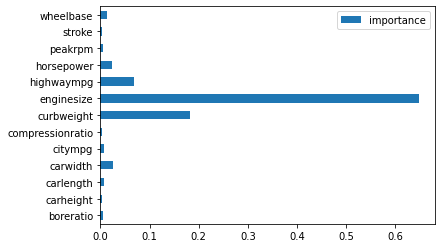

In [15]:
# 변수 중요도
importance = rf_reg.feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index=features)
df_importance.plot(kind='barh')

# 나이브베이즈(Naive Bayes) 분류

## 개념
- 데이터가 각 클레스에 속할 특정 확률을 계싼하는 조건부 확률 기반 분류 방법
- 나이브(Naive)라는 이름은, 예측한 특징을 상호 독립적이라는 가정 하여 계산을 단순화 하였기 때문

### 베이즈 정리(Bayes' Theorem)
#### 개념
- 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리
- 사건 A, B가 있을 때, 사건 B가 일어난 것을 전제로 한 사건 A의 조건부 확률을 구하는 것
- 하지만 현재 가지고 있는 정보는 사건 A가 일어난 것을 전제로 한 사건 B의 조건부 확률과, A와 B의 확률 뿐

#### 베이즈 정리
- 표본공간 S는 서로소인 $A_1, A_2, ... A_n$의 합집합
- B는 S위에서 정리된 사건, %P(A) \neq 0$
#### $P(A_k|B)$ 식
<img src="img/06-73.png" width="600"/>

- $P(A|B)$ : 사후확률(Posterior), 사건 B가 발생 했을 때 사건 A가 발생할 확률
- $P(B|A)$ : 우도(Likelihood), 사건 A가 발생했을 때, 사건 B가 발생할 확률
- $P(A \cap B)$ : 사건 A과 사건 B가 동시에 발생할 확률
- $P(A)$ : 사전확률(Prior), 사건 A가 발생할 확률
- $P(B)$ : 관찰값(Evidence), 사건 B가 발생할 확률

##### '자동차 사고로 인한 확률 게임'
```
자동차 사고로 사망한 사람의 40%는 안전띠를 메지 않았다고 한다. 그렇다면 60%는 안전띠를 매고 죽었다는 의미인데 안전띠가 더 위험한 것인가?
```
- 전체 운전자의 95%가 안전띠 착용, 나머지 5%가 미착용
- 전체 운전자 1만명 중 1명 골로 자동차 사고로 사망
- 안전띠 착용 -> A, 사망 -> B
- $P(A|B) = 0.6$, $P(A) = 0.95$, $P(B) = 0.0001$
- 안전띠 착용시 자동차로 사망할 확률

<img src="img/06-74.png" width="600"/>

- 안전띠 미착용시 자동차 사고로 사망할 확률

<img src="img/06-75.png" width="600"/>

- 따라서, 안전띠 미착용시 10배 이상 사망 확률이 높다.

### 나이브베이즈 분류
#### 개념
- 하나의 속성값을 기준으로 다른 속성이 독립이라는 가정 (클래스 조건 독립성 class conditional independence)
- 해당 속성이 클래스 분류에 미치는 영향도 측정

#### 나이브베이즈 분류 작동 원리
- 사후확률 계산이 목적 : 메시지에 복권이라는 단어가 발견 되었을 때, 그 메시지가 스펨일 확률은?
- 사전확률은 이미 알고 있거나 학습 샘플 데이터로 학습시킨 결과, '전체 메일에서 스펨이 차지하는 비율'
- 주변우도, 학습 셈플 데이터를 통해, 복권이라는 단어가 포함된 메일의 비율 (P(스팸), P(복권)은 서로 독립 가정)

#### 라플라스 스무딩
- 나이브베이즈 분류를 보정하는 기법, 특정 출현 횟수 초깃값 보정
- 발견되지 않은 특징의 출연 빈도를 1로 설정
- 다중 분류 모델에서 특징이 없는 값으로 인해 0을 곱해 발생하는 문제 극복

#### 나이브베이즈 분류의 장단점

<img src="img/06-76.png" width="600"/>

#### 나이브베이즈 분류를 선택할 수 있는 경우
- 데이터가 많지 않을 때
- 추정의 목적이 미래 예측일 때

#### scikit-learn의 나이브베이즈 분류기
- BernoulliNB : 데이처 출연 여부에 따라 1 또는 0으로 구분 (동전)
- MultinomialNB : 데이터의 출연 횟수에 따라 값을 달리하는 데이터 (주사위)
- GaussianNB : 연속적인 성질이 있는 특징의 데이터, 정규분포 가정

## scikit-learn의 GaussianNB
```python
class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

### 매개변수

<img src="img/06-77.png" width="600"/>

### 메서드

<img src="img/06-78.png" width="600"/>

### 코드 실습
- kaggle의 Sloan Digital Sky Survey DR14 데이터
- 우주 관측결과에 따라 물체가 은하인지 별인지 분류 예측


In [1]:
import pandas as pd

df = pd.read_csv('./data/Skyserver.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [2]:
# class는 범주형
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

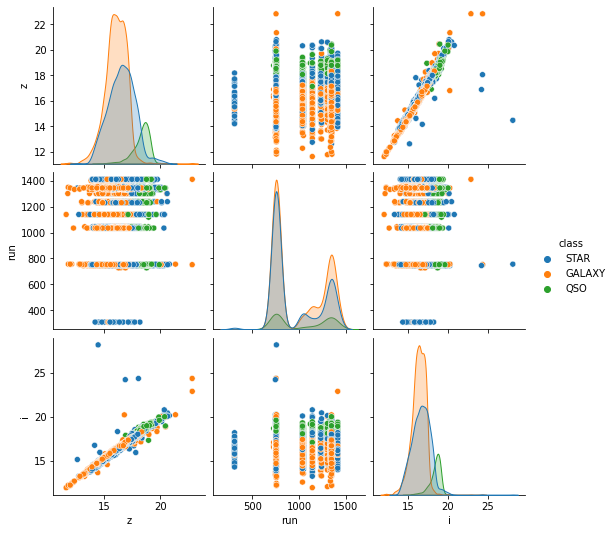

In [6]:
# class 변수를 타겟으로, 산점도 그려 보기

import seaborn as sns
sns.pairplot(data=df[['z','run','i', 'class']], hue='class')

In [7]:
# class 변수를 타겟, 나머지를 설명변수로
import numpy as np

X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [9]:
# GaussianNB로 분류 모델 학습 및 예측
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f'Accuracy_score : {gnb.score(X_test, y_test)}')

Accuracy_score : 0.799


In [10]:
# 평가 
from sklearn.metrics import classification_report
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

## scikit-learn의 BernoulliNB
```python
class sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
```

### 매개변수

<img src="img/06-79.png" width="600"/>

### 메서드

<img src="img/06-80.png" width="600"/>

### 코드 실습
- UCI Machine Learning 저장소의 SMS 스펨 메시지 데이터로 스펨 분류기 만들기

In [14]:
import pandas as pd
df = pd.read_csv('./data/spam.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# 컬럼 2~4 번은 결측치가 과반을 넘어 제거 한다.
df=df.iloc[:, :2]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
# v1은 스펨 여부에 관한 데이터
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
# spam이면 1 아니면 0으로 변환
import numpy as np
df.loc[:, 'label'] = np.where(df['v1'] == 'spam', 1, 0)
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [22]:
X = df['v2']
y = df['label']

In [24]:
# X 를 출현한 모든 단어의 개수만큼의 벡터를 만들고, 임베딩 시킨다.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
X_cv = cv.fit_transform(X)
print(X[0])
print(X_cv[0])
print(X.shape, X_cv.shape)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
  (0, 3544)	1
  (0, 8032)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2317)	1
  (0, 1289)	1
  (0, 5537)	1
  (0, 4082)	1
  (0, 1738)	1
  (0, 3628)	1
  (0, 8495)	1
  (0, 4476)	1
  (0, 1736)	1
  (0, 2037)	1
  (0, 7648)	1
  (0, 3588)	1
  (0, 1054)	1
  (0, 8271)	1
(5572,) (5572, 8709)


In [29]:
# array로 변환
X_cv.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# 문자열로 변환
cv.inverse_transform(X_cv.toarray())[0]

array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'go',
       'got', 'great', 'in', 'jurong', 'la', 'only', 'point', 'there',
       'until', 'wat', 'world'], dtype='<U34')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=.3, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 8709), (1672, 8709), (3900,), (1672,))

In [34]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [35]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9796650717703349

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.86      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## scikit-learn의 MultinomialNB
```python
class sklearn.naive_bayes.MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
```

### 매게변수

<img src="img/06-81.png" width="600"/>

### 메서드

<img src="img/06-82-01.png" width="600"/>
<br>
<img src="img/06-82-02.png" width="600"/>

### 코드 실습
- IMDB 영화 리뷰, 긍정/부정 분류

In [38]:
import pandas as pd 

df = pd.read_csv('./data/IMDB Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [39]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
# sentiment를 positive가 1이 되게 label 추가
import numpy as np

df.loc[:, 'label'] = np.where(df['sentiment'] == 'positive', 1, 0)
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [41]:
# review를 벡커로 임베딩

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
X = cv.fit_transform(df['review'])
y = df['label']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 101895), (15000, 101895), (35000,), (15000,))

In [43]:
# MultinomialNB 로 학습
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [44]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8592666666666666

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      7500
           1       0.88      0.83      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

